In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.image as mpimg

In [2]:
grid = pd.read_csv('../00_csv_files/10km_grid_within_nuts3.csv').sort_values(by=['bottom','left'])
#grid.to_csv('../00_csv_files/10km_grid_within_nuts3.csv',index=False)
grid.head(5)

,X,Y,left,top,right,bottom,id,NUTS_ID,NUTS_NAME
0,74917.76409,3641.428192,69917.76409,8641.428192,79917.76409,-1358.571808,976,UKK30,Cornwall and Isles of Scilly
1,84917.76409,3641.428192,79917.76409,8641.428192,89917.76409,-1358.571808,1098,UKK30,Cornwall and Isles of Scilly
2,94917.76409,3641.428192,89917.76409,8641.428192,99917.76409,-1358.571808,1220,UKK30,Cornwall and Isles of Scilly
3,104917.76409,3641.428192,99917.76409,8641.428192,109917.76409,-1358.571808,1342,UKK30,Cornwall and Isles of Scilly
4,134917.76409,3641.428192,129917.76409,8641.428192,139917.76409,-1358.571808,1708,UKK30,Cornwall and Isles of Scilly


In [80]:
bottoms = np.array(sorted(list(set(grid['bottom'].values.tolist())),reverse=True))
lefts = np.array(sorted(list(set(grid['left'].values.tolist())),reverse=True))

In [81]:
print(len(bottoms))
print(len(lefts))
print(len(bottoms)*len(lefts))

122
66
8052


In [82]:
# set up dictionary: gridcoords[bottom,left] = gridID
gridcoords = {}
for i,r in grid.iterrows():    
    b = str(r['bottom'])
    l = str(r['left'])
    bl = b + ',' + l    
    if bl not in gridcoords.keys():        
        gridID = r['id']
        gridcoords[bl] = gridID
print(len(gridcoords.keys()))

3570


In [83]:
# function from x,y return bottom,left coordinates for 10km grid square
def xyToGridBottomLeft(coord,bottoms,lefts):
    (x,y) = coord
    bottom = bottoms[np.argmax(bottoms<y)]
    left = lefts[np.argmax(lefts<x)]
    return ','.join(str(i) for i in [bottom,left])

In [84]:
## testing
# coord = 279500,693500
# x,y = coord
# bl = xyToGridBottomLeft(coord,bottoms,lefts)
# print(bl)
# print(gridcoords[bl])

In [3]:
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
eid_data.sample(3)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
2030,2061178,11003,1950,246500,217500,UKL14,2660,308000.0,186000.0,UKL15,3764
369371,1345303,11009,1949,407500,501500,UKE13,6182,428000.0,569000.0,UKC22,5189
363372,2197155,11012,1952,371500,497500,UKF30,6063,531000.0,182000.0,UKI11,6570


In [4]:
# decided that I do not need grid centroid coordinates here.
# I can get them from '../00_csv_files/10km_grid_within_nuts3.csv'
# ed = eid_data[['eid','center','DOB','POB_north','POB_east','POB_NUTSID',
#               'POB_gridID','POR_east','POR_north','POR_NUTSID']]
eid.to_csv('../00_csv_files/eid_data.csv',index=False)

In [55]:
POR_gridID = np.zeros(len(eid_data))

In [63]:
# less than a minute
for i,r in eid_data.iterrows():
    east = r['POR_east']
    north = r['POR_north']
    bl = xyToGridBottomLeft((east,north),bottoms,lefts)
    POR_gridID[i] = gridcoords[bl]

In [66]:
POR_gridID = [int(i) for i in list(POR_gridID)]

In [90]:
eid_data['POR_gridID'] = POR_gridID

In [73]:
eid_data.head(3)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618
2,4778319,11005,1946,798500,66500,UKM64,775,323000.0,669000.0,UKM25,3959


In [74]:
eid_data.to_csv('../00_csv_files/eid_data.csv',index=False)

# stuff above is adding grid points to eid_data.
# Start here to do analysis.

In [ ]:
# for QGIS, make a csv (10km_grid_with_ukb_points.csv) of 
# gridID,X,Y,POBcount,PORcount

In [5]:
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
eid_data.head(2)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618


In [6]:
grid = pd.read_csv('../00_csv_files/10km_grid_within_nuts3.csv')
grid.head(2)

,X,Y,left,top,right,bottom,id,NUTS_ID,NUTS_NAME
0,74917.76409,3641.428192,69917.76409,8641.428192,79917.76409,-1358.571808,976,UKK30,Cornwall and Isles of Scilly
1,84917.76409,3641.428192,79917.76409,8641.428192,89917.76409,-1358.571808,1098,UKK30,Cornwall and Isles of Scilly


In [7]:
gridIDs = sorted(grid['id'].values)
pobGrids = set(eid_data['POB_gridID'].values)
porGrids = set(eid_data['POR_gridID'].values)
grids_with_points = sorted(list(pobGrids | porGrids))
print(len(gridIDs),len(grids_with_points))
print(len(pobGrids),len(porGrids))

8781 2187
2154 1562


# POR is in 592 fewer grids !?

In [61]:
POBcount = {}
PORcount = {}
for id in grids_with_points:
    POBcount[id] = len(eid_data[eid_data['POB_gridID']==id])
    PORcount[id] = len(eid_data[eid_data['POR_gridID']==id])

In [63]:
# check the counts
d = PORcount
total = 0
for k in d.keys():
    total += d[k]
print(total)

442400


In [57]:
gridx = dict(zip(grid['id'],grid['X']))
gridy = dict(zip(grid['id'],grid['Y']))

In [69]:
# save the CSV
o = open('../00_csv_files/10km_grid_with_ukb_points.csv','w')
o.write('gridID,X,Y,POBcount,PORcount\n')
for id in grids_with_points:
    o.write(','.join([str(n) for n in [id,gridx[id],gridy[id],POBcount[id],PORcount[id]]])+'\n')
o.close()

In [12]:
# count POB and POR points in grid - have too many?
grid_ukb_points = pd.read_csv('../00_csv_files/10km_grid_with_ukb_points.csv')
grid_ukb_points.head(3)

,gridID,X,Y,POBcount,PORcount
0,774,64917.76409,803641.428192,1,0
1,775,64917.76409,793641.428192,2,0
2,892,74917.76409,843641.428192,9,0


In [76]:
# these look good.
pobs = grid_ukb_points['POBcount'].values
pors = grid_ukb_points['PORcount'].values

print('pob_points',np.sum(pobs))
print('por_points',np.sum(pors))
print(len(eid_data))

pob_points 442400
por_points 442400
442400


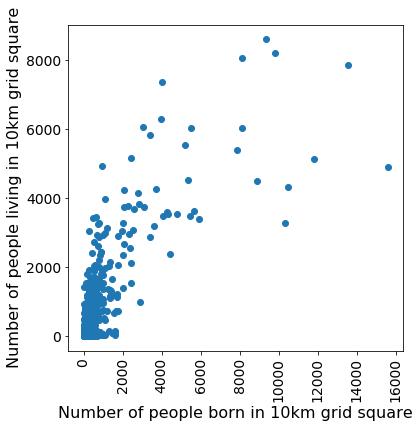

In [87]:
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
ax.scatter(pobs,pors)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel('Number of people born in 10km grid square', fontsize=16)
ax.set_ylabel('Number of people living in 10km grid square', fontsize=16)
plt.show()

### Map: Which points are POB only? Which points are POR only?

In [10]:
# pobGrids and porGrids are sets ... 
# in pobGrids but NOT in porGrids
pobOnly = list(pobGrids - porGrids)
porOnly = list(porGrids - pobGrids)
print(len(pobOnly),len(porOnly)) # 625, 33

625 33


In [16]:
# get these coordinates from grid_ukb_points . . .  
grid_ukb_points[grid_ukb_points['gridID'].isin(porOnly)].to_csv('../00_csv_files/10km_grid_por_only.csv',index=False)
grid_ukb_points[grid_ukb_points['gridID'].isin(pobOnly)].to_csv('../00_csv_files/10km_grid_pob_only.csv',index=False)

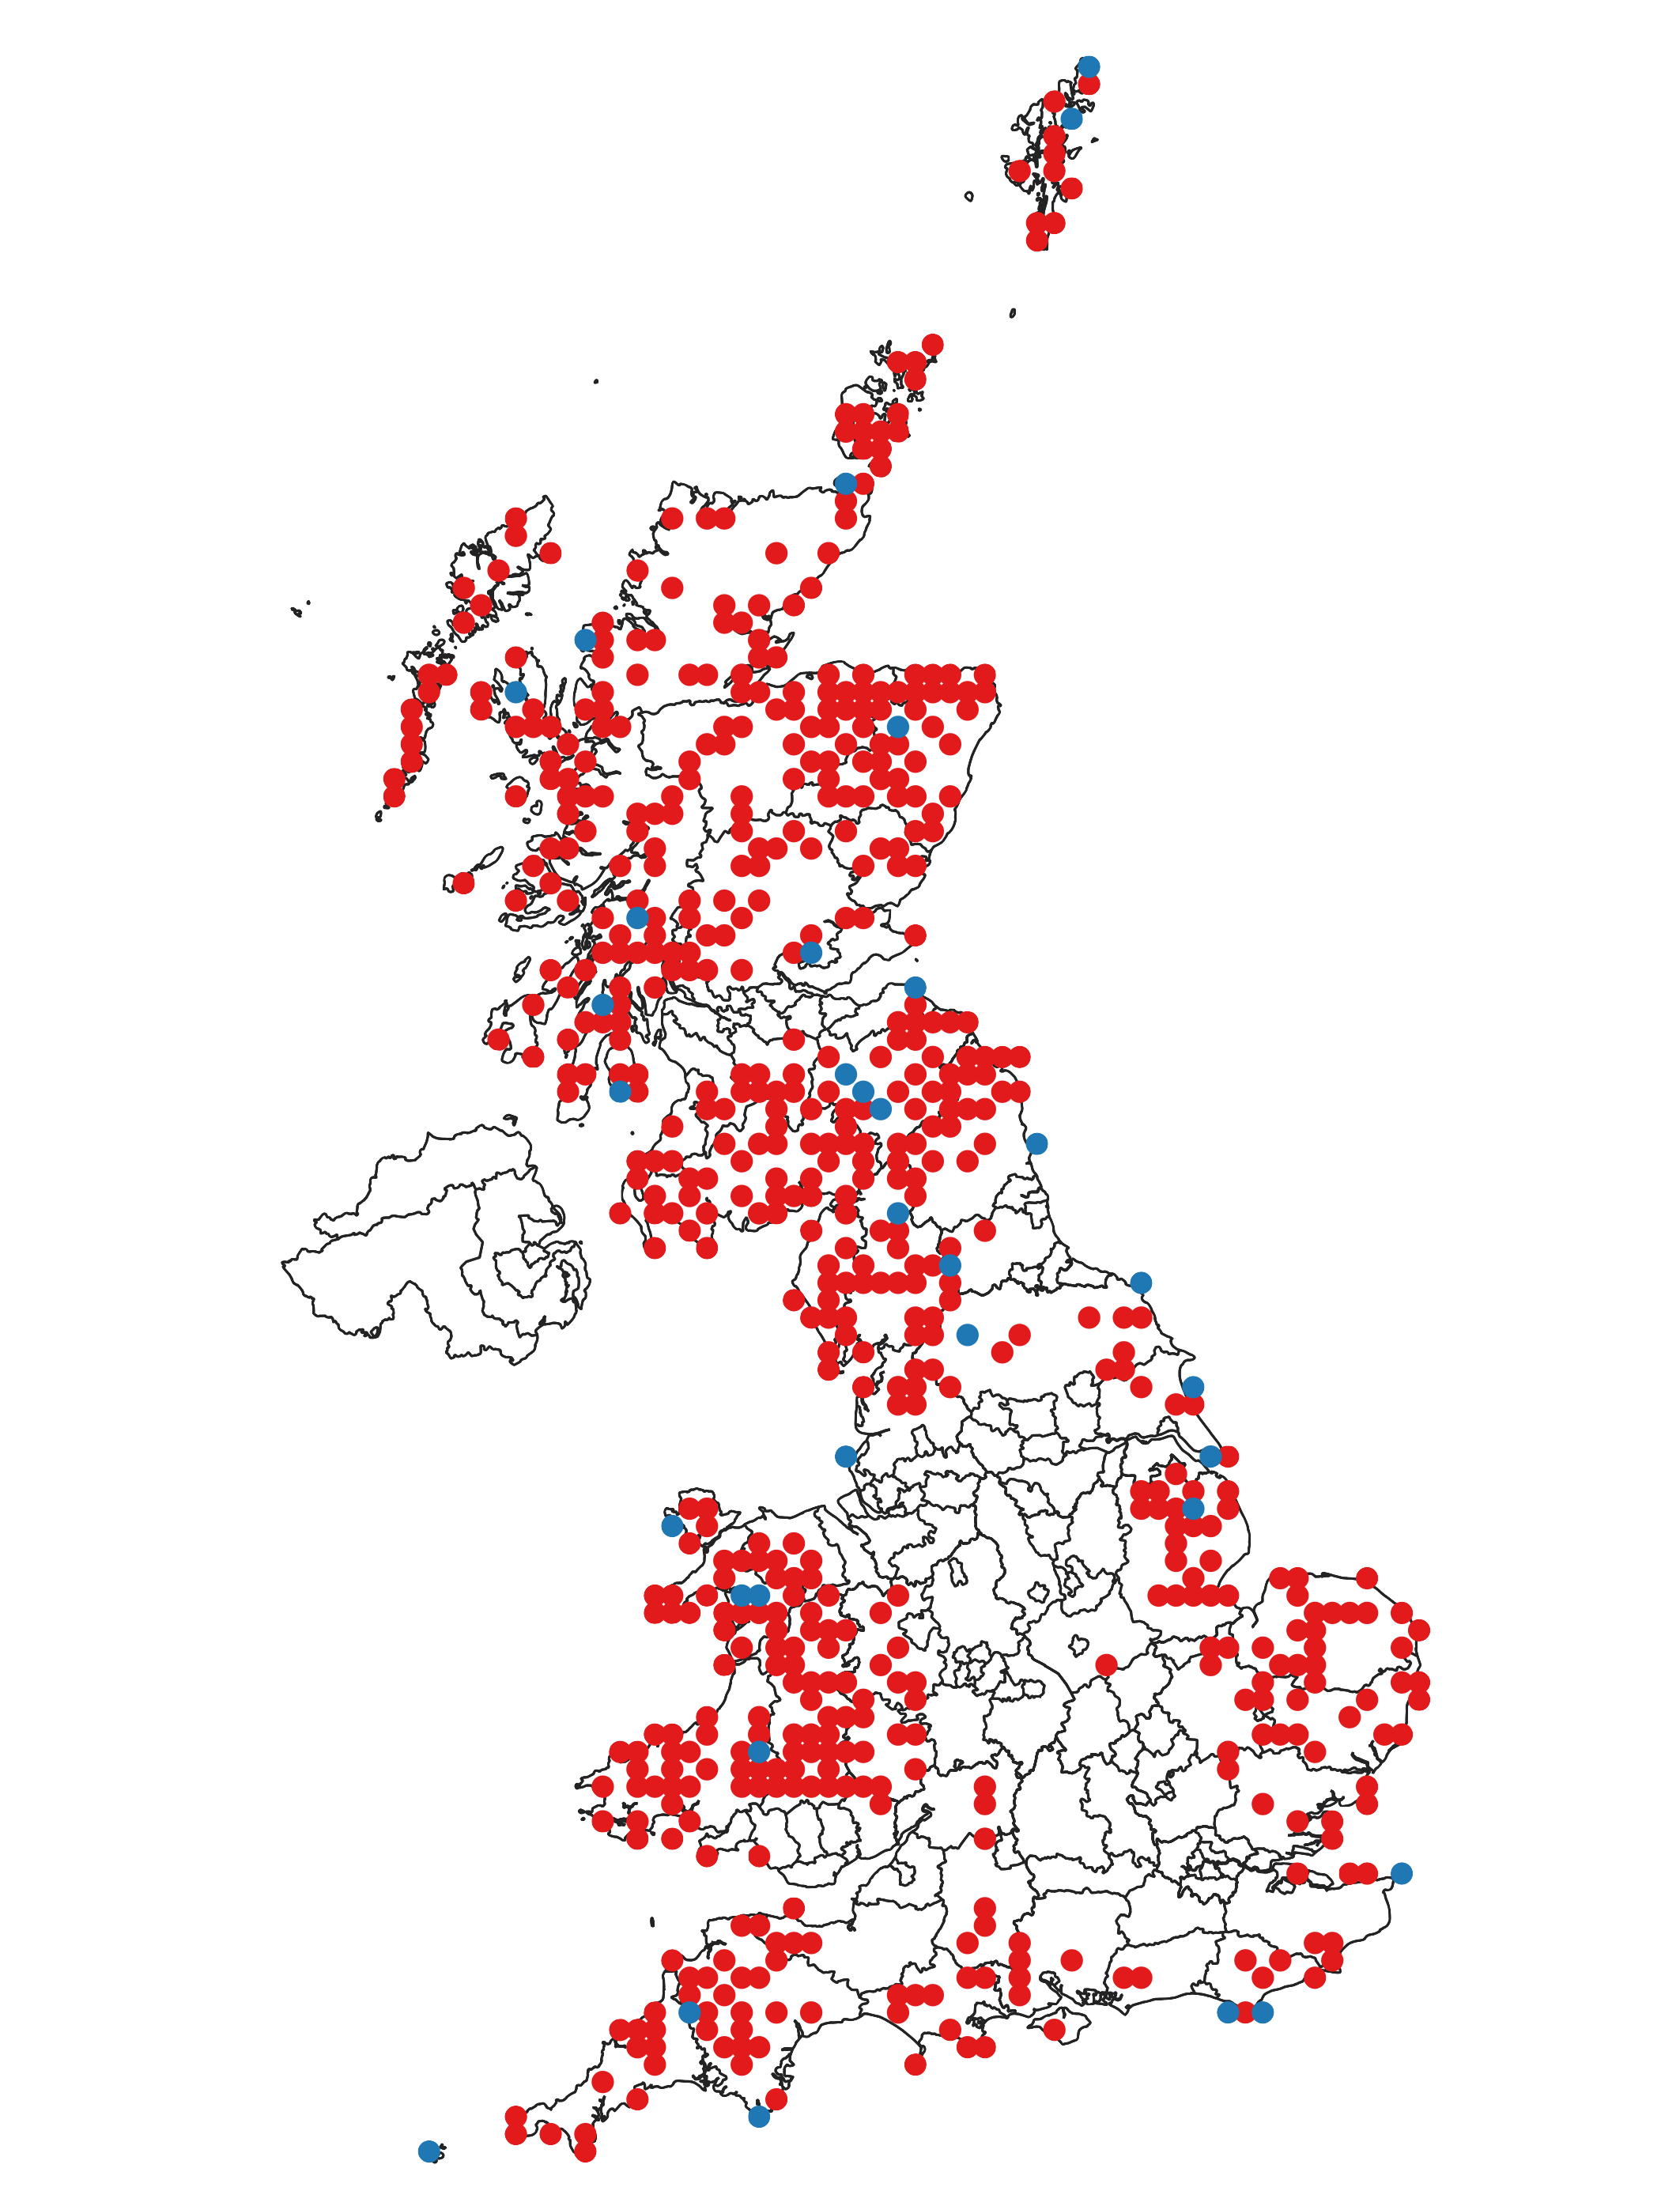

In [19]:
Image(filename='../01_images_figures/10km_grid_pob_por_only.png',width=300) 

# grid points vs assessment center

In [88]:
ac = pd.read_csv('../00_csv_files/assessmentCentreCoordinates.csv')

In [90]:
ac.head(2)

,Name,Count,East,North,Code
0,Barts,12582,531807,181602,11012
1,Birmingham,25501,406790,287314,11021


In [91]:
eid_data.head(2)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618


In [132]:
len(eid_data[eid_data['center']==11012])

8462

In [117]:
#QGIS csv: assessment_centers_for_grid.csv
#gridID,x,y,centerCodePOB,centerCodePOR

# go through eid_data
# POBgrid[id].append(center) (after checking if in keys)
# PORgrid[id].append(center) (after checking if in keys)

# each key in POBgrid
# get value = list of centers, find which center is in list most
from collections import Counter

def most_common(lst):
    if len(lst)>0:
        data = Counter(lst)
        return data.most_common(1)[0][0]
    else:
        return ''

In [103]:
ac_POBgrid= {}
ac_PORgrid = {}

for i,r in eid_data.iterrows():
    POBid = r['POB_gridID']
    PORid = r['POR_gridID']
    c = r['center']
    
    if POBid in ac_POBgrid.keys():
        ac_POBgrid[POBid].append(c)
    else:
        ac_POBgrid[POBid] = [c]
        
    if PORid in ac_PORgrid.keys():
        ac_PORgrid[PORid].append(c)
    else:
        ac_PORgrid[PORid] = [c]

In [118]:
most_common([])

''

In [127]:
grid_ukb_points = pd.read_csv('../00_csv_files/10km_grid_with_ukb_points.csv')
grid_ukb_points.head(3)

,gridID,X,Y,POBcount,PORcount
0,774,64917.76409,803641.428192,1,0
1,775,64917.76409,793641.428192,2,0
2,892,74917.76409,843641.428192,9,0


In [128]:
grids_with_points = grid_ukb_points['gridID'].values.tolist()
len(grids_with_points)

2187

In [129]:
o = open('../00_csv_files/assessment_centers_for_grid.csv','w')
o.write('gridID,x,y,POB_max_center,POR_max_center\n')
for id in grids_with_points:
    
    if id not in ac_POBgrid.keys():
        ac_POBgrid[id] = ''
        
    if id not in ac_PORgrid.keys():
        ac_PORgrid[id] = ''
    
    POB_max_center = most_common(ac_POBgrid[id])
    POR_max_center = most_common(ac_PORgrid[id])
    
    o.write(','.join(str(n) for n in [id,gridx[id],gridy[id],POB_max_center,POR_max_center]) + '\n')

In [126]:
len(grids_with_points)

2187

In [133]:
assessment_grid = pd.read_csv('../00_csv_files/assessment_centers_for_grid.csv')
assessment_grid.head(3)

,gridID,x,y,POB_max_center,POR_max_center
0,774,64917.76409,803641.428192,11004.0,NaN
1,775,64917.76409,793641.428192,11004.0,NaN
2,892,74917.76409,843641.428192,11020.0,NaN


In [138]:
acs_eid = set(eid_data['center'].values.tolist())

In [149]:
ac = pd.read_csv('../00_csv_files/assessmentCentreCoordinates.csv')
ac_ukb = set(ac['Code'].values.tolist())

In [150]:
print(len(ac_ukb),len(acs_eid))
print(len(ac_ukb & acs_eid),len(acs_eid))
ac.sort_values(by='Code')

21 21
21 21


,Name,Count,East,North,Code
11,Manchester,13940,398106,383819,11001
15,Oxford,14059,451230,206228,11002
4,Cardiff,17878,317841,176760,11003
7,Glasgow,18647,259106,665369,11004
6,Edinburgh,17198,325764,673964,11005
18,Stoke,19433,436809,278683,11006
16,Reading,29411,471404,173255,11007
3,Bury,28322,380313,410782,11008
13,Newcastle,37004,425606,563642,11009
9,Leeds,44199,429691,433831,11010


In [148]:
acs_eid

{11001,
 11002,
 11003,
 11004,
 11005,
 11006,
 11007,
 11008,
 11009,
 11010,
 11011,
 11012,
 11013,
 11014,
 11016,
 11017,
 11018,
 11020,
 11021,
 11022,
 11023}

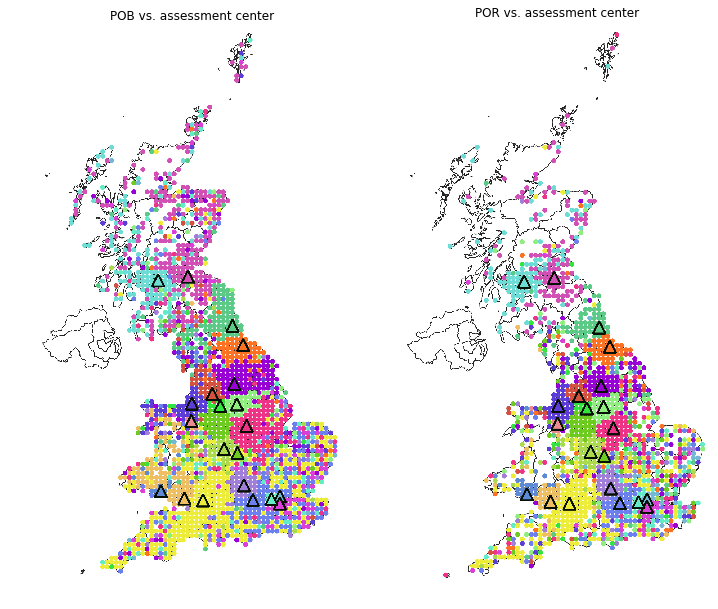

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))
img1=mpimg.imread('../01_images_figures/assessment_centers_pob.png')
img2=mpimg.imread('../01_images_figures/assessment_centers_por.png')
ax1.imshow(img1)
ax1.set_axis_off()
ax1.set_title('POB vs. assessment center')
ax2.imshow(img2)
ax2.set_axis_off()
ax2.set_title('POR vs. assessment center')
plt.show()